# Question 2.4 Pokemon

Given that the dataset is on pokemon, the easiest data to find patterns with is in the attributes. This notebook looks at exploring possible classes of pokemon based on their attributes, i.e. strong pokemon and weak pokemon clusters.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from collections import Counter

#### Data naming

In [2]:
df = pd.read_csv('./pokemon.csv')

In [3]:
speed = df['speed']
sp_attack = df['sp_attack']
sp_defense = df['sp_defense']
attack = df['attack']
defense = df['defense']
hp = df['hp']

#### Analysis

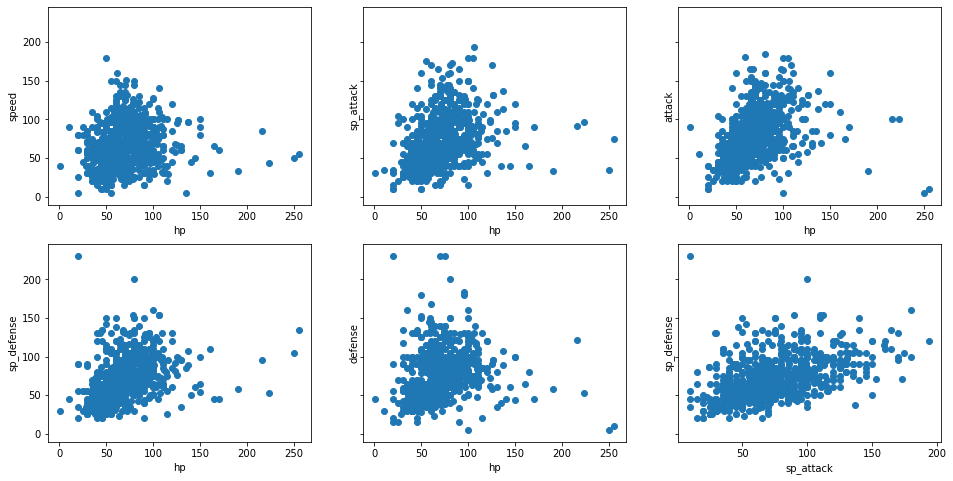

In [4]:
fig, ax = plt.subplots(2, 3, figsize=(16, 8), sharey=True)
values = [[hp,speed],[hp, sp_attack], [hp, attack],[hp, sp_defense],[hp, defense],[sp_attack, sp_defense],[attack, defense]]
xlabels = ['hp', 'hp', 'hp', 'hp', 'hp', 'sp_attack', 'attack']
ylabels = ['speed', 'sp_attack', 'attack', 'sp_defense', 'defense', 'sp_defense', 'defense']
for axi, value, xlabel, ylabel in zip(ax.flat, values, xlabels, ylabels):
    axi.scatter(value[0], value[1])
    axi.set_xlabel (xlabel)
    axi.set_ylabel(ylabel)
    

There's not that much information that can be obtained from a 2D plot without reducing the data, but from these plots we can see the general growth of stats alongside health, and the last plot shows that the special attack is stronger than the special defense, which is easily understandable for game balancing reasons.

Looking at the details, special attack and normal attack seem to be slightly stronger than the other attributes, but the differences are minor.

Looking generally, it can be seen that a large proportion of the pokemon fall into a singular dense cluster which is likely the attribute range for normal pokemon. There are some pokemon who have exceptionally high health (the points on the right hand side of each plot) which are likely strong pokemon, since they tend to have mostly average attributes, except for one which they specialise in, when comparing the graphs. There is also clearly a set of defensive oriented pokemon which can be seen in the bottom middle graph, although their numbers are relatively small.

Out of all of them, speed is the most uniform blob with only a few fast and high hp pokemon.

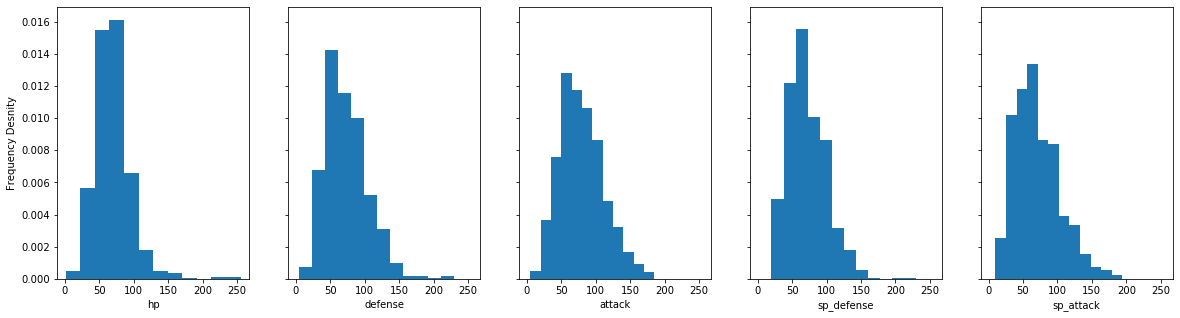

In [5]:
fig, ax = plt.subplots(1, 5, figsize=(20, 5), sharey=True, sharex=True)
items = [hp, defense, attack, sp_defense, sp_attack]
xlabels = ['hp', 'defense', 'attack', 'sp_defense', 'sp_attack']

for axi, item, xlabel in zip(ax.flat, items, xlabels):
    axi.hist(item, density=True, bins=12)
    axi.set_xlabel(xlabel)

    axi.set(ylabel='Frequency Desnity')
    axi.label_outer()

Looking at the density shows the variation of each attribute. Health seems to have little deviation, but others such as atack have a much wider spread. This looks like there may be a set of pokemon who will specialise in attributes such as special attack and normal attack than others.

Next is to create the data. The format will be a 2D array containing arrays of the five attributes.

In [6]:
data = np.vstack((hp, defense, attack, sp_defense, sp_attack)).T
print(data)

[[ 45  49  49  65  65]
 [ 60  63  62  80  80]
 [ 80 123 100 120 122]
 ...
 [223  53 101  53  97]
 [ 97 101 107  89 127]
 [ 80 115  95 115 130]]


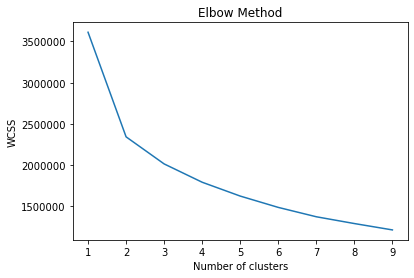

In [7]:
k_max = 10
wcss = []
for i in range(1, k_max):
    kmeans = KMeans(n_clusters=i, max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, k_max), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

From what can be seen in the plot, it could easily separate 2 clusters, the strong and the weak supposedly. Since more clusters are expected and preferable from the previous data, I've chosen 6 to hopefully see more specific classes of pokemon.

In [8]:
kmeans = KMeans(n_clusters=6, max_iter=300, n_init=10, random_state=0)
kmeans.fit(data)

centers = kmeans.cluster_centers_
centers.shape
print(centers)

[[ 68.27692308 135.03076923  84.55384615  97.44615385  61.53846154]
 [ 50.24671053  50.55592105  54.33552632  48.59539474  48.10855263]
 [ 89.88095238  95.52380952 122.89285714  97.9047619  124.98809524]
 [ 73.79012346  74.47530864  66.05555556  89.19753086  96.75925926]
 [ 78.00591716  78.84023669 106.91715976  69.47928994  65.66863905]
 [166.82352941  54.17647059  73.94117647  75.11764706  71.70588235]]


Immediately looking at the centers, a relatively normal set of attributes [4th] can be seen, as well as strong defense oriented [2nd] and strong hp oriented [6th] pokemon. To visualise the centers better, instead of reducing the data, a radar plot can be put to much better use, visualising the clusters very effectively for attributes.

<ipython-input-35-9ce010329eee>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111, polar=True)


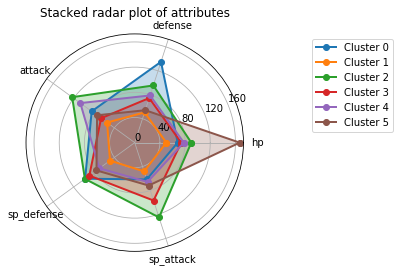

Cluster Sizes
Cluster 0 - 65
Cluster 1 - 304
Cluster 2 - 84
Cluster 3 - 162
Cluster 4 - 169
Cluster 5 - 17


In [35]:
def make_stacked_radar_chart(name, centers=centers):
    '''
    An adjusted function to make a radar plot using centers.
    
    |param name| Title of plot
    |param centers| 
    '''
    # Hardcoded for ease
    labels = ['hp', 'defense', 'attack', 'sp_defense', 'sp_attack']
    markers = [0, 40, 80, 120, 160]
    
    # Angles for plotting at
    angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)
    angles = np.concatenate((angles,[angles[0]]))
    fig= plt.figure()
    
    # Add each cluster
    cluster = 0
    for center in centers:
        # Points for bounding
        center = np.concatenate((center,[center[0]]))
        
        # Boundary of attributes with fill
        ax = fig.add_subplot(111, polar=True)
        ax.plot(angles, center, 'o-', linewidth=2, label="Cluster " + str(cluster))
        ax.fill(angles, center, alpha=0.25)
        
        # Meta
        ax.set_thetagrids((angles/np.pi) * 180, labels)
        plt.yticks(markers)
        ax.set_title(name)
        cluster += 1
        
    ax.legend(loc='upper center', bbox_to_anchor=(1.5, 1), ncol=1)
    return plt.show()


make_stacked_radar_chart("Stacked radar plot of attributes") 
count = Counter(kmeans.labels_)
print("Cluster Sizes")
for index in range(len(count)):
    print("Cluster", index, "-", count[index])

From the radar plot it is easy to spot certain differences in clusters.

    Cluster 0 are defense oriented
    Cluster 1 are weak all rounders
    Cluster 2 are offensive oriented
    Cluster 3 are normal, with high special attack
    Cluster 4 are normal, with high normal attack
    Cluster 5 are tanks

These clusters can be easily associated with specific styles of pokemon strength such as defensive pokemon through the radar plot.

Looking at the sizes of each cluster, in order, can give insights into how common or rare each style of pokemon is.

    Cluster 1 (Weak) are extremely common
    Cluster 3,4 (Normal) are common
    Cluster 2 (Off) are rare
    Cluster 0 (Def) are rare
    Cluster 5 (Tanks) are extremely rare
    
Different numbers of clusters were also tried, but tend to simply average out two of these discovered clusters, or split a single cluster into two.

These results were slightly different and more detailed from the expected findings of clusters of pokemon of increasing attributes but decreasing size, however they have clearly led to other conclusions which are still distinct.